# Pivot Tables with Pandas - Lab

## Introduction

In this lab, we'll learn how to make use of our newfound knowledge of pivot tables to work with real-world data.  We'll start by exploring 

## Objectives

You will be able to:

* Understand and explain what a multi-level hierarchical index is
* Understand, explain the difference and use df.pivot and pd.pivot_table
* Switch between “long” and “wide” in a DataFrame using stack() and unstack()
* Transform “wide” to “long” DataFrames using `melt`

## Getting Started

### Import Pandas and Matplotlib.pyplot Using Standard Aliases

In the cell below:

* Import `pandas` and set the standard alias
* Import `matplotlib.pyplot` and set the standard alias
* Run the ipython magic command to display matplotlib graphs inline within the notebook

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load the Data
The data for this activity is stored in a file called `'causes_of_death.tsv'` which is a somewhat morbid dataset from the center for disease control. Note that the file extension .tsv indicates that this data is formatted slightly differently then the standard .csv, the difference being that it has 'tab seperated values' instead of 'comma seperated values'. As such, pass in the optional parameter `delimiter='\t'` into the `pd.read_csv()` method.

In [3]:
df = pd.read_csv('causes_of_death.tsv', delimiter='\t')

Now, display the head of the DataFrame to ensure everything loaded correctly.

In [4]:
df.head()

,Notes,State,State Code,Ten-Year Age Groups,Ten-Year Age Groups Code,Gender,Gender Code,Race,Race Code,Deaths,Population,Crude Rate
0,NaN,Alabama,1,< 1 year,1,Female,F,American Indian or Alaska Native,1002-5,14,3579,Unreliable
1,NaN,Alabama,1,< 1 year,1,Female,F,Asian or Pacific Islander,A-PI,24,7443,322.5
2,NaN,Alabama,1,< 1 year,1,Female,F,Black or African American,2054-5,2093,169339,1236.0
3,NaN,Alabama,1,< 1 year,1,Female,F,White,2106-3,2144,347921,616.2
4,NaN,Alabama,1,< 1 year,1,Male,M,Asian or Pacific Islander,A-PI,33,7366,448.0


Our data is currently in **_Wide_** format.  We can tidy this up by converting it to **_Long_** format by using groupby statements to aggregate our data into a much neater, more readable format. 

## Groupby Aggregations

Complete the following groupby statements.

### 1) Groupby State and Gender. Sum the values.

In [5]:
# Grouped by State and Gender
df.drop(['State Code', 'Notes'], axis=1).groupby(['State', 'Gender']).sum()

Deaths
State                Gender         
Alabama              Female   430133
                     Male     430647
Alaska               Female    27199
                     Male      36135
Arizona              Female   396028
                     Male     442066
Arkansas             Female   258243
                     Male     264671
California           Female  2125965
                     Male    2181096
Colorado             Female   277787
                     Male     283496
Connecticut          Female   278653
                     Male     252637
Delaware             Female    68001
                     Male      67932
District of Columbia Female    46436
                     Male      47637
Florida              Female  1512891
                     Male    1618220
Georgia              Female   630265
                     Male     628752
Hawaii               Female    78586
                     Male      93658
Idaho                Female    97727
                     Male     102350
Illinois             Female   960785
                     Male     911386
Indiana              Female   523603
                     Male     508031
...                              ...
Oklahoma             Female   327885
                     Male     328650
Oregon               Female   288677
                     Male     287275
Pennsylvania         Female  1199018
                     Male    1114837
Rhode Island         Female    93397
                     Male      82869
South Carolina       Female   360313
                     Male     372258
South Dakota         Female    63781
                     Male      64818
Tennessee            Female   533373
                     Male     533354
Texas                Female  1457648
                     Male    1511566
Utah                 Female   127955
                     Male     132524
Vermont              Female    48868
                     Male      46432
Virginia             Female   542518
                     Male     528645
Washington           Female   431062
                     Male     434624
West Virginia        Female   193664
                     Male     192560
Wisconsin            Female   436397
                     Male     421232
Wyoming              Female    37153
                     Male      40233

[102 rows x 1 columns]

### 2) Groupby State and Gender and Race. Find the average values.

In [6]:
# Groupby State and Gender and Race
df.drop(['State Code', 'Notes'], axis=1).groupby(['State', 'Gender', 'Race']).mean()

Deaths
State         Gender Race                                          
Alabama       Female American Indian or Alaska Native     70.875000
                     Asian or Pacific Islander            95.500000
                     Black or African American          9074.000000
                     White                             29890.636364
              Male   American Indian or Alaska Native     86.375000
                     Asian or Pacific Islander            78.400000
                     Black or African American          9298.000000
                     White                             27241.166667
Alaska        Female American Indian or Alaska Native    597.909091
                     Asian or Pacific Islander           124.777778
                     Black or African American            79.444444
                     White                              1707.636364
              Male   American Indian or Alaska Native    738.272727
                     Asian or Pacific Islander           122.400000
                     Black or African American           106.400000
                     White                              2338.727273
Arizona       Female American Indian or Alaska Native   1309.727273
                     Asian or Pacific Islander           376.272727
                     Black or African American           995.090909
                     White                             30544.666667
              Male   American Indian or Alaska Native   1586.500000
                     Asian or Pacific Islander           365.272727
                     Black or African American          1130.083333
                     White                             33787.416667
Arkansas      Female American Indian or Alaska Native     61.571429
                     Asian or Pacific Islander            86.900000
                     Black or African American          3136.818182
                     White                             20221.636364
              Male   American Indian or Alaska Native     64.111111
                     Asian or Pacific Islander            84.636364
...                                                             ...
Washington    Female Black or African American           913.727273
                     White                             36369.272727
              Male   American Indian or Alaska Native    625.818182
                     Asian or Pacific Islander          1375.727273
                     Black or African American          1221.818182
                     White                             33263.916667
West Virginia Female American Indian or Alaska Native     16.250000
                     Asian or Pacific Islander            36.600000
                     Black or African American           534.818182
                     White                             17048.454545
              Male   American Indian or Alaska Native     15.250000
                     Asian or Pacific Islander            28.800000
                     Black or African American           543.545455
                     White                             16943.272727
Wisconsin     Female American Indian or Alaska Native    273.181818
                     Asian or Pacific Islander           218.727273
                     Black or African American          1645.000000
                     White                             37535.545455
              Male   American Indian or Alaska Native    306.636364
                     Asian or Pacific Islander           221.000000
                     Black or African American          1861.181818
                     White                             35905.000000
Wyoming       Female American Indian or Alaska Native     77.500000
                     Asian or Pacific Islander            24.200000
                     Black or African American            30.500000
                     White                              3279.454545
              Male   American Indian or Alaska Na

### 3) Groupby Gender and Race. Find the minimum values.

In [7]:
# Groupby Gender and Race
df.drop(['State Code', 'Notes'], axis=1).groupby(['Gender', 'Race']).min()

State Ten-Year Age Groups  \
Gender Race                                                            
Female American Indian or Alaska Native  Alabama           1-4 years   
       Asian or Pacific Islander         Alabama           1-4 years   
       Black or African American         Alabama           1-4 years   
       White                             Alabama           1-4 years   
Male   American Indian or Alaska Native  Alabama           1-4 years   
       Asian or Pacific Islander         Alabama           1-4 years   
       Black or African American         Alabama           1-4 years   
       White                             Alabama           1-4 years   

                                        Ten-Year Age Groups Code Gender Code  \
Gender Race                                                                    
Female American Indian or Alaska Native                        1           F   
       Asian or Pacific Islander                               1           F   
       Black or African American                               1           F   
       White                                                   1           F   
Male   American Indian or Alaska Native                        1           M   
       Asian or Pacific Islander                               1           M   
       Black or African American                               1           M   
       White                                                   1           M   

                                        Race Code  Deaths Population  \
Gender Race                                                            
Female American Indian or Alaska Native    1002-5      10     100285   
       Asian or Pacific Islander             A-PI      10     100371   
       Black or African American           2054-5      10     100170   
       White                               2106-3      12    1000704   
Male   American Indian or Alaska Native    1002-5      10       1001   
       Asian or Pacific Islander             A-PI      10    1000019   
       Black or African American           2054-5      10       1000   
       White                               2106-3      10    1005401   

                                        Crude Rate  
Gender Race                                         
Female American Indian or Alaska Native       10.4  
       Asian or Pacific Islander              10.1  
       Black or African American             100.3  
       White                                  10.1  
Male   American Indian or Alaska Native    10000.0  
       Asian or Pacific Islander              10.0  
       Black or African American            1000.4  
       White                                  10.6

### 4) Create a bar chart of the total number of deaths by state.
* Sort your columns in order (ascending or descending are both acceptable).  
* Also make sure to include a title, axes labels and have your graph be an appropriate size.

**_NOTE:_** In order to do this, slice the `Deaths` column after the `.groupby()` method, but before the `sum()` method.  You can even chain the `.plot()` call on after the `sum()` call and do this all on one line, excluding the labeling of the graph!

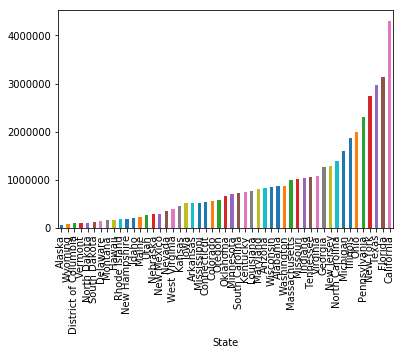

In [8]:
#Your code here
df.groupby(['State']).sum()['Deaths'].sort_values().plot.bar(x='State', y='Deaths', rot=90)

### Inspecting our Data

Let's go one step further and get a print-out of the data type of each column. 

In the cell below, get the `.info()` of our DataFrame, and note the data type that each column is currently stored as.  

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4115 entries, 0 to 4114
Data columns (total 12 columns):
Notes                       0 non-null float64
State                       4115 non-null object
State Code                  4115 non-null int64
Ten-Year Age Groups         4115 non-null object
Ten-Year Age Groups Code    4115 non-null object
Gender                      4115 non-null object
Gender Code                 4115 non-null object
Race                        4115 non-null object
Race Code                   4115 non-null object
Deaths                      4115 non-null int64
Population                  4115 non-null object
Crude Rate                  4115 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 385.9+ KB


Let's look at some samples from the Population column to see if the current encoding seems appropriate for the data it contains. 

In the cell below, display the population values for the first 5 rows in the DataFrame.  

In [10]:
df['Population'].head()

0      3579
1      7443
2    169339
3    347921
4      7366
Name: Population, dtype: object

Just to be extra sure, let's check the value counts to see how many times each unique value shows up in the dataset. We'll only look at the top 5. 

In the cell below, print out the top 5 `value_counts()` of the population column of the DataFrame. 

In [11]:
df['Population'].value_counts().head()

Not Applicable    75
11680              2
42847              2
249                2
85539              2
Name: Population, dtype: int64

Clearly, this data should be stored as a numeric type, not a categorical type.  
 
### 5 a) Reformat the Population Column as an Integer
As stands, not all values will be able to be reformated as integers. Most of the cells in the the `Population` column contain integer values, but the entire column is currently encoded in string format because some cells contain the string `"Not Applicable"`.

We need to remove these rows before we can cast the Population column to an Integer data type. 

In the cell below:

* Slice the rows of `df` where the Population column is equal to `'Not Applicable'`.
* Use `to_drop.index`  to drop the offending rows from `df`. Be sure to set the `axis=0`, and `inplace=True`
* Cast the Population column to an integer data type using the `.astype()` function, with the single parameter `int64` passed in. 
* Print the Population column's `dtype` attribute to confirm it is now stored in `int64` format. 

**_NOTE:_** `.astype()` returns a copy of the column, so make sure you set the Population column equal to what this method returns--don't just call it!

In [21]:
#Your code here
to_drop = df.loc[(df['Population'] == 'Not Applicable')]
# to_drop
df.drop(to_drop.index, axis=0, inplace=True)

In [26]:
df['Population']=df['Population'].astype('int64')
df['Population'].dtype

dtype('int64')

### 5 b) Complete the Bar Chart

Now that we've reformatted our data, let's create a bar chart of the of the Mean Population by State.

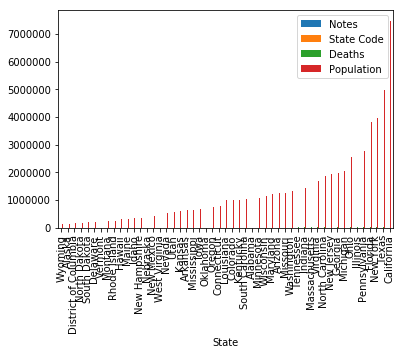

In [35]:
#Your code here
df.groupby(['State']).mean().sort_values(by='Population').plot.bar()

Below we will investigate how we can combine the **pivot** method along with the **groupby** method to combine some cool **stacked bar charts**!

## Using Aggregate Functions

In the cell below:

* Group `df` by `'State'` and  `'Gender'`, and then slice both `'Deaths'` and `'Population'` from it. Chain the `.agg()` method to return the mean, min, max, and standard deviation these sliced columns. 

**_NOTE:_** This only requires one line of code.  

By now, you've probably caught on that the code required to do this follows this pattern:    `([things to group by])[columns to slice].agg([aggregates to return])`

Then, display the head of this of this new DataFrame.

In [ ]:
# A sample groupby similar to above. 
grouped = None

Note how Pandas denotes a multi-hierarchical index in the DataFrame above.  

Let's inspect how a multi-hierarchical index is actually stored.  

In the cell below, display the `index` attribute of this DataFrame. 

A two-dimensional array denotes the multiple levels, with each possible combination being a row in our `grouped` DataFrame.  

Let's reset the index, and then see how it changes. 

In the cell below, call the DataFrame's `reset_index()` function.  Then, display the head of the DataFrame.  

In [ ]:
# First, reset the index. Notice the subtle difference; State and Gender are now columns rather then the index.
grouped = None

Note how the way the index is displayed has changed.  The index columns that made up the multi-hierarchical index before are now stored as columns of data, with each row given a more traditional numerical index. 

Let's confirm this by reexamining the `index` attribute of `grouped` in the cell below.

However, look again at the displayed DataFrame--specifically, the columns.  Resetting the index has caused the DataFrame to use a mutlti-indexed structure for the columns. 

In the cell below, examine the `columns` attribute of `grouped` to confirm this. 

In [ ]:
#Notice that this causes columns to be MultiIndexed!


### Column Levels

Since we're working with miulti-hierarchical indices, we can examine the indices available at each level.

In the cell below, use the `get_level_values` method contained within the DataFrame's `columns` object to get the values for the outermost layer of the index. 

Now, get the level values for the inner layer of the index. 

## Flattening the DataFrame

We can also **_flatten_** the DataFrame from a multi-hierarchical index to more traditional one-dimensional index.  We do this by creating each unique combination possible of every level of the multi-hierarchical index.  Since this is a complex task, you do not need to write it--but take some time to examine the code in the cell below and see if you can understand how it works! 

In [ ]:
#We could also flatten these:
cols0 = grouped.columns.get_level_values(0)
cols1 = grouped.columns.get_level_values(1)
grouped.columns = [col0 + '_' + col1 if col1 != '' else col0 for col0, col1 in list(zip(cols0, cols1))]
#The list comprehension above is more complicated then what we need but creates a nicer formatting and
#demonstrates using a conditional within a list comprehension.
#This simpler version works but has some tail underscores where col1 is blank:
#grouped.columns = [col0 + '_' + col1 for col0, col1 in list(zip(cols0, cols1))]
grouped.columns

Now that we've flattened the DataFrame, let's inspect a couple rows to see what it looks like. 

In the cell below, inspect the head of the `grouped` DataFrame. 

## Using Pivots

Now, we'll gain some practice using the DataFrame class's built-in `.pivot()` method.  

In the cell below, call the DataFrame's pivot method with the following parameters:

* index = `'State'`
* columns = `'Gender'`
* values = `'Deaths_mean'`

Then, display the head of our new `pivot` DataFrame to see what it looks like. 

In [ ]:
# Now it's time to pivot!
pivot = None

Great! We've just created a pivot table.  

Let's reset the index and see how it changes our pivot table. 

In the cell below, reset the index of the `pivot` object as we did previously.  Then, display the head of the object to see if we can detect any changes.

In [ ]:
# Again, notice the subtle difference of reseting the index:
pivot = None

### Visualizing Data With Pivot Tables

Now, we'll make use of our newly created pivot table to quickly create some visualizations of our data.  

In the cell below, call `pivot.plot()` with the following parameters:

* kind = `'barh'`
* figsize = `(15,8)`

In [ ]:
# Now let's make a sweet bar chart!!


Notice the Y-axis is currently just a list of numbers.  That's because when we reset the index, it defaulted to assigning integers as the index for the DataFrame.  Let's set the index back to `'State'`, and then recreate the visualization. 

In the cell below:

* Use the `pivot` object's `set_index()` method and set the index to `'State'`.  Then, chain this with a `.plot()` call to recreate the visualization using the code we used in the cell above.  

All the code in this cell should be done in a single line.  Just call the methods--do not rebind `pivot` to be equal to this line of code. 

In [ ]:
#Where's the states?! Notice the y-axis is just a list of numbers.
#This is populated by the DataFrame's index.
#When we used the .reset_index() method, we created a new numbered index to name each row. 
#Let's fix that by making state the index again.


Now, that we've created a visualization with the states as the y-axis, let's print out the head of the `pivot` object again. 

In [ ]:
# Also notice that if we call the DataFrame pivot again, state is not it's index.
#The above method returned a DataFrame with State as index and we plotted it,
#but it did not update the DataFrame itself.


Note that the index has not changed.  That's because the code we wrote when we set the index to the 'State' column returns a copy of the DataFrame object with the index set to 'State'--by default, it does not mutate original `pivot` object.  

If we want to do that, we'll need to capture the new object returned by updating the contents of the `pivot` variable.  

In the cell below, set the index of `pivot` to `'State'`.  Then, recreate the bar plot using this new object.  

In [ ]:
#If we wanted to more permanently change the index we would set it first and then plot:
pivot = None

Again, let's check the head of the DataFrame to confirm that the index structure has changed.  

Finally, let's stack these bar charts to see how that looks. 

In the cell below, recreate the visualization we did in the cell above, but this time, also pass in `stacked=True` as a parameter. 

In [ ]:
# Lastly, let's stack each of these bars for each state.
#Notice we don't have to worry about index here, because we've already set it above.


## Stacking and Unstacking DataFrames

Now, let's get some practice stacking and unstacking DataFrames. 

### Stacking

In the cell below, let's display the head of `grouped` to remind ourselves of the format we left it in. 

As we can see above, `grouped` is currently in a flattened format, with no hierarchical structure to it's indices.  

In the cell below, call the `grouped` DataFrame's `.stack()` method. 

As we can see, the `stack()` method has stacked our DataFrame from a flattened format into one with a multi-hierarchical index! This is an easy, quick way to aggregate our data.

### Unstacking 

Now, we'll explore unstacking with the `pivot` DataFrame, which is already stacked into a pivot table. 

In the cell below, set unstack `pivot` using the object's `.unstack()` method. Then, display the object to see how it has changed. 

In [ ]:
pivot = None

Note that it has unstacked the multi-hierarchical structure of the `pivot` DataFrame by one level. Let's call it one more time and display the results!

In the cell below, set pivot equal to `pivot.unstack()` again, and then display the `pivot` object to see how things have changed.

In [ ]:
pivot = None

After calling unstack a second time, we can see that `pivot` has a flattened structure, since it has been completely unstacked!

## Summary

In this lab, we learned how to:

* Use `groupby` to stack and slice data conditionally
* Use aggregate functions in combination with groupby statements
* Create pivot tables with pandas
* Leverage pivot tables and groupby statements to create quick visualizations
* `stack` and `unstack` DataFrames 